Requirements for Sentiment Analysis with python 
1. Create a Twitter developer account and use data source from Twitter
2. Use UCM as the search keyword
3. Use git to push a Jupitor Notebook with a readme file to GitHub
4. Submit the github link to Blackboard.

# Step 1: Install required Libraries

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 14.4 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 24.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.7 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=52e0a3938f1f5b8ae5e7caa8c1df02d0033d9de2a9605ed8fd9edbba9f917c85
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d3221

In [11]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API (tokens from my twitter account)

In [12]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [14]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  1000


In [15]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  261
negative number:  321
neutral number:  418


In [16]:
tweet_list[0:20]

,0
0,"@peterjordan100 Peter, o UCM parou no Ultimato..."
1,RT @DepDocHppss: Todos presentes en el desfile...
2,RT @ali_morales23_: La mejor trilogía del UCM ...
3,RT @peterjordan100: Geral falando bem de Guard...
4,@Kiba_SnyderFan @DCEUMX Te quedaste en el pasa...
5,"RT @MWSUGriffons: SB FINAL/5 | Just won, baby!..."
6,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
7,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
8,+ Além de aprofundar a relação entre os protag...
9,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...


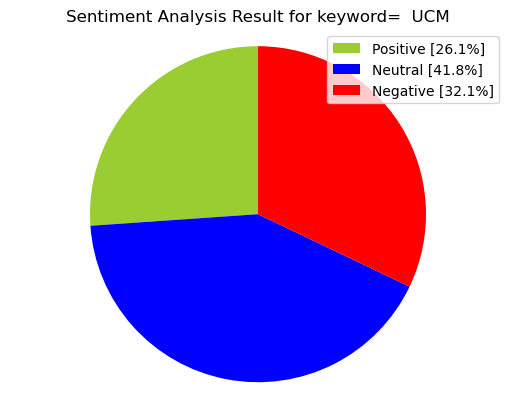

In [17]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [18]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [19]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"@peterjordan100 Peter, o UCM parou no Ultimato...","@peterjordan100 Peter, o UCM parou no Ultimato..."
1,RT @DepDocHppss: Todos presentes en el desfile...,RT @DepDocHppss: Todos presentes en el desfile...
2,RT @ali_morales23_: La mejor trilogía del UCM ...,RT @ali_morales23_: La mejor trilogía del UCM ...
3,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
4,@Kiba_SnyderFan @DCEUMX Te quedaste en el pasa...,@Kiba_SnyderFan @DCEUMX Te quedaste en el pasa...
...,...,...
977,La trilogía de Marvel que empecé en Murcia y c...,La trilogía de Marvel que empecé en Murcia y c...
989,Guardiões da Galáxia Vol. 3 promete subir o ní...,Guardiões da Galáxia Vol. 3 promete subir o ní...
996,Discusión Final de Tesis de Dotorado del MSc. ...,Discusión Final de Tesis de Dotorado del MSc. ...
997,#GuardiansoftheGalaxyVol3 es una obra maestra...,#GuardiansoftheGalaxyVol3 es una obra maestra...


In [20]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"@peterjordan100 Peter, o UCM parou no Ultimato...",peter o ucm parou no ultimato desde l s ...
1,RT @DepDocHppss: Todos presentes en el desfile...,todos presentes en el desfile acubaponlecora...
2,RT @ali_morales23_: La mejor trilogía del UCM ...,la mejor trilog a del ucm james gunn no...
3,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
4,@Kiba_SnyderFan @DCEUMX Te quedaste en el pasa...,snyderfan te quedaste en el pasado jajajaj...
5,"RT @MWSUGriffons: SB FINAL/5 | Just won, baby!...",sb final 5 just won baby no 6 missouri...
6,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
7,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...
8,+ Além de aprofundar a relação entre os protag...,al m de aprofundar a rela o entre os protag...
9,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm


In [21]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_7483/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@peterjordan100 Peter, o UCM parou no Ultimato...",peter o ucm parou no ultimato desde l s ...,0.000000,0.000000,negative,0.196,0.804,0.000,-0.2960
1,RT @DepDocHppss: Todos presentes en el desfile...,todos presentes en el desfile acubaponlecora...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @ali_morales23_: La mejor trilogía del UCM ...,la mejor trilog a del ucm james gunn no...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@Kiba_SnyderFan @DCEUMX Te quedaste en el pasa...,snyderfan te quedaste en el pasado jajajaj...,0.000000,0.000000,negative,0.206,0.794,0.000,-0.5267
5,"RT @MWSUGriffons: SB FINAL/5 | Just won, baby!...",sb final 5 just won baby no 6 missouri...,0.033333,0.466667,positive,0.171,0.584,0.245,0.4404
6,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,+ Além de aprofundar a relação entre os protag...,al m de aprofundar a rela o entre os protag...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.500000,0.500000,positive,0.000,0.625,0.375,0.2023


In [22]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [23]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [24]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,177,54.29
positive,79,24.23
negative,70,21.47


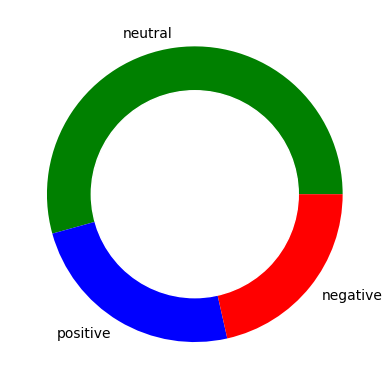

In [25]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [26]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()

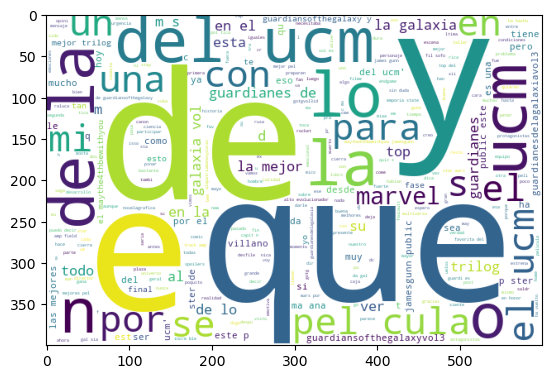

In [27]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

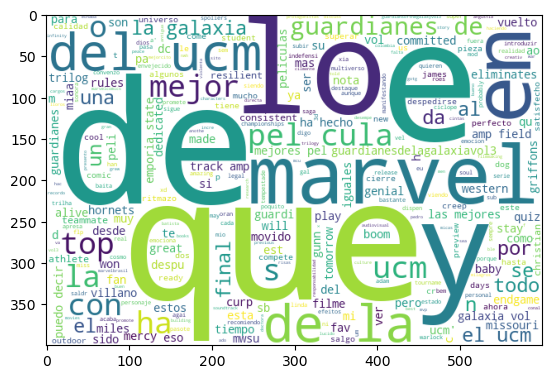

In [28]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

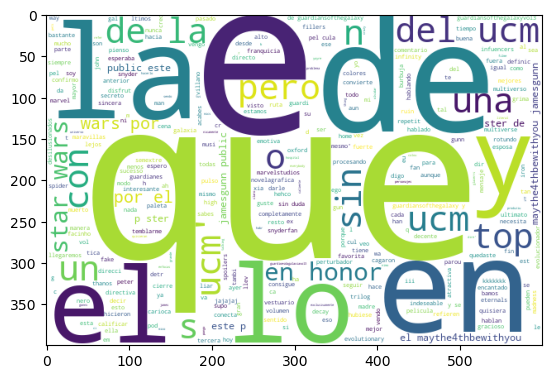

In [29]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

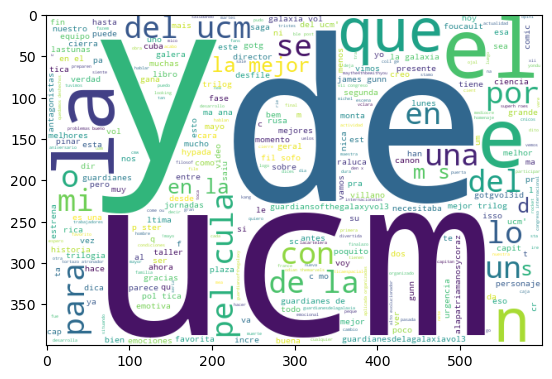

In [30]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)